# <center>Rozwiązywanie układów równań</center>
# <center>Metody iteracyjne</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [15]:
import main
import scipy as sp
import numpy as np
import scipy.sparse.linalg as sp_linalg
import numpy.linalg as np_linalg
import matplotlib
import matplotlib.pyplot as plt

**Cel zajęć:**  
Celem zajęć jest zapoznanie się z iteracyjnymi metodami rozwiązywania układów równań liniowych w postaci macierzowej. Metody iteracyjne, w przeciwieństwie do analitycznych, nie zwracają dokładnego rozwiązania, a jedynie jego przybliżenie. Przy spełnionych kryteriach, przybliżenia obliczane w kolejnych iteracjach są zbieżne do dokładnego rozwiązania. Metody iteracyjne znajdują swoje zastosowanie szczególnie przy dużych układach równań postaci: 
   
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Zdefiniuję funkcję *diag_dominant_matrix_A_b*, przyjmującą paramter całkowity $m>0$ która zwróci:
- macierz diagonalnie zdominowana $\mathbf{A}$ o wymiarach $m \times m$ (wyrazy na przekątnej sa wieksze co do modułu od sumy pozostałych w danej kolumnie i wierszu)
- wektor $\mathbf{b}$ o wymiarach $m \times 1$ 
 
o losowych wartościach całkowitych

Dodatkowo zdefiniuj funkcje *is_diag_dominant* sprawdzającą czy zadana macierz jest diagonalnie zdominowana

***Zadanie 2***   
Zdefiniuję funkcję *symmetric_matrix_A_b*, przyjmującą paramter całkowity $m>0$ która zwróci:
- symetryczną macierz $\mathbf{A}$ o wymiarach $m \times m$ (wyrazy symetryczne względnej przekątnej są sobie równe)
- wektor $\mathbf{b}$ o wymiarach $m \times 1$ 
 
o losowych wartościach całkowitych

Dodatkowo zdefiniuj funkcje is_symmetric sprawdzającą czy zadana macierz jest symetryczna

***Zadanie 3***   
Zdefiniuję następujące układy równań:

a) $\mathbf{A_1}$, $\mathbf{b_1}$: gdzie $\mathbf{A_1}$ jest macierzą o wymiarach $m \times m$, a $\mathbf{b_1}$ wektorem $m \times 1$, $m = 10$

b) $\mathbf{A_2}$, $\mathbf{b_2}$: gdzie $\mathbf{A_2}$ jest macierzą **diagonalnie zdominowaną** o wymiarach$m \times m$, a $\mathbf{b_2}$ wektorem $m \times 1$, $m = 10$
 
c) $\mathbf{A_3}$, $\mathbf{b_3}$: gdzie $\mathbf{A_3}$ jest macierzą **symetryczną** o wymiarach $m \times m$, a $\mathbf{b_3}$ wektorem $m \times 1$, $m = 10$   
 
**Wskazówka**: Do generacji macierzy użyj metody *random_matrix_Ab* z lab6 oraz metod *diag_dominant_matrix_A_b* i *symmetric_matrix_A_b*

In [16]:
from main import symmetric_matrix_A_b, is_symmetric, diag_dominant_matrix_A_b, is_diag_dominant

m = 10

A1,b1 = np.random.randint(9, size=(m, m)), np.random.randint(9, size=m)
A2,b2 = diag_dominant_matrix_A_b(m)
A3,b3 = symmetric_matrix_A_b(m) 

print(is_diag_dominant(A2))
print(is_symmetric(A3))
print(is_symmetric(A2))
print(is_diag_dominant(A3))

True
True
False
False


***Zadanie 4***   
Zaimplementuj iteracyjną metodę *solve_jacobi*, rozwiązującą układ równań metodą Jacobiego zgodnie z dokumentacją w pliku *main.py*.
Szczegóły metody zostały przedstawione na wykładzie.

***Zadanie 5***   
Rozwiąż układ równań z Zadania 3 podpunkt a) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

Funkcja solve

In [17]:
from main import residual_norm, solve_jacobi
iter_num = [1, 2, 3, 4, 5, 6,7, 8, 9,10, 12, 15, 20, 25, 30, 35, 50]

result1 = np_linalg.solve(A1, b1)
error1 = residual_norm(A1, result1, b1)
print(error1)

print('Timing: ')
%timeit -r 30 -n 20 -o np_linalg.solve(A1, b1)

print("Błąd dla metody z użyciem solve  wynosi: {}\n".format(error1))

6.2842938400131246e-15
Timing: 
8.97 µs ± 2.41 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
Błąd dla metody z użyciem solve  wynosi: 6.2842938400131246e-15



Metoda Jackobiego

In [18]:
if is_diag_dominant(A1):
    error2 = []
    times = []
    errorbar2 = []
    iterations = []

    for n in iter_num:

        x_init = np.zeros(m)
        result2 = solve_jacobi(A1, b1, x_init, maxiter = n)
        err2 = residual_norm(A1, result2[0], b1)
        iterations.append(result2[1])
        print(err2)
        error2.append(err2)
        time = %timeit -r 30 -n 20 -o solve_jacobi(A1, b1, x_init, maxiter = n)
        times.append(time.average)
        errorbar2.append(time.stdev)

    plt.errorbar(iter_num, times, yerr = errorbar2, marker="o")
    plt.grid()
    plt.show()

    plt.plot(iter_num, error2)
    plt.yscale('log')
    plt.grid()
    plt.show()

    plt.plot(iter_num, iterations)
else:
    print("Macierz nie spełnia warunków koniecznych do zastosowania metody Jackobiego (nie jest diagonalnie dominująca)")

Macierz nie spełnia warunków koniecznych do zastosowania metody Jackobiego (nie jest diagonalnie dominująca)


Metoda Gradientów Sprzężonych

In [19]:
if is_symmetric(A1):    
    error3 = []
    times = []
    errorbar3 = []
    

    for n in iter_num:

        x_init = np.zeros(m)
        result3 = sp.sparse.linalg.cg(A1, b1, maxiter = n)
        err3 = residual_norm(A1, result3[0], b1)
        print(err3)
        error3.append(err3)
        time = %timeit -r 30 -n 20 -o sp.sparse.linalg.cg(A1, b1, maxiter = n)
        times.append(time.average)
        errorbar3.append(time.stdev)

    plt.errorbar(iter_num, times, yerr = errorbar3, marker="o")
    plt.grid()
    plt.xlabel("maksymalna liczba iteracji")
    plt.ylabel("czas [s]")
    plt.title("Zależność czasu wykonywania od liczby iteracji")
    plt.show()

    plt.plot(iter_num, error3)
    plt.yscale('log')
    plt.grid()
    plt.show()

else:
    print("Macierz nie jest symetryczna. Nie można zastosować metody CG dla tej macierzy.")
    

Macierz nie jest symetryczna. Nie można zastosować metody CG dla tej macierzy.


Metoda GMRES

9.808669418135487
120 µs ± 19.5 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
9.7659549925537
177 µs ± 19.9 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
8.993926701763492
286 µs ± 37.6 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
8.466558584478111
367 µs ± 17.3 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
7.923345422520553
546 µs ± 112 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
7.821178830185091
695 µs ± 87.5 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
4.078880482731465
950 µs ± 241 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
1.5939376581161466
1.17 ms ± 282 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
0.055848634087240424
1.28 ms ± 31.2 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
1.9045422152893763e-14
228 µs ± 17.5 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
1.9045422152893763e-14
234 µs ± 15.6 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
1.90454221

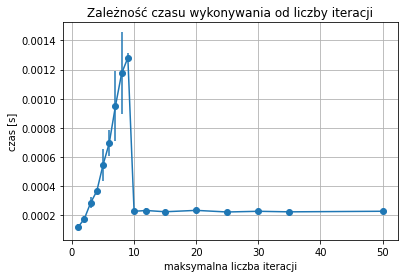

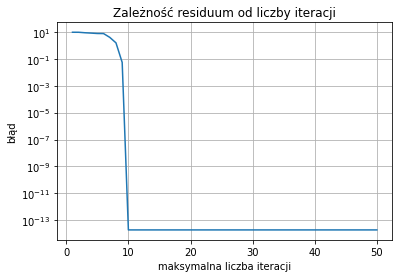

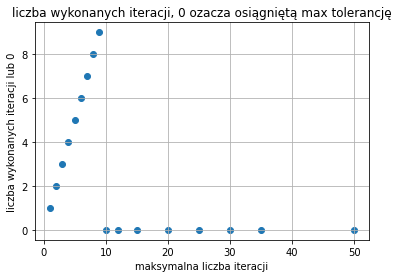

In [20]:
error4 = []
times = []
errorbar4 = []
exit = []

for n in iter_num:

    x_init = np.zeros(m)
    result4 = sp.sparse.linalg.gmres(A1, b1, restart = n, maxiter = n)
    err4 = residual_norm(A1, result4[0], b1)
    exit.append(result4[1])
    print(err4)
    error4.append(err4)
    time = %timeit -r 30 -n 20 -o sp.sparse.linalg.gmres(A1, b1, restart = n, maxiter = n)
    times.append(time.average)
    errorbar4.append(time.stdev)

plt.errorbar(iter_num, times, yerr = errorbar4, marker="o")
plt.grid()
plt.xlabel("maksymalna liczba iteracji")
plt.ylabel("czas [s]")
plt.title("Zależność czasu wykonywania od liczby iteracji")
plt.show()

plt.plot(iter_num, error4)
plt.yscale('log')
plt.grid()
plt.xlabel("maksymalna liczba iteracji")
plt.title("Zależność residuum od liczby iteracji")
plt.ylabel("błąd")
plt.show()

plt.scatter(iter_num, exit)
plt.grid()
plt.xlabel("maksymalna liczba iteracji")
plt.ylabel("liczba wykonanych iteracji lub 0")
plt.title("liczba wykonanych iteracji, 0 ozacza osiągniętą max tolerancję")
plt.show()

Wygląda na to, że w przypadku zwykłych, losowych macierzy funkcja solve spisuje się lepiej od metody GMRES.
Błąd dla solve, jak i GMRES (po osiągnięciu optymalnej liczby restartów i iteracji) jest rzędu e-15, jednak czas
wykonywania operacji dla solve, mimo że się sporo wacha, pozostaje dużo mniejszy niż dla GMRES.
Dla 10 resetów po 10 iteracji GRMES osiągnęło już błąd akceptowalny w tolerancji, i czas wykonywania już pozostawał na stałym poziomie.

***Zadanie 6***     
Rozwiąż układ równań z Zadania 3 podpunkt b) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

Funkcja solve

In [29]:
result1 = np_linalg.solve(A2, b2)
error1 = residual_norm(A2, result1, b2)

print('Timing: ')
%timeit -r 30 -n 20 -o np_linalg.solve(A2, b2)

print("Błąd dla metody z użyciem solve  wynosi: {}\n".format(error1))

Timing: 
9.01 µs ± 3.08 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
Błąd dla metody z użyciem solve  wynosi: 2.710399819191012e-15



Metoda Jackobiego

8.558920512667049
24.2 µs ± 6.1 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
3.9357376764344294
30.3 µs ± 2.78 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
1.8144336539704622
40.3 µs ± 6.26 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
0.8389663778509635
46.7 µs ± 4.2 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
0.3876000314288389
55 µs ± 4.6 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
0.17909734105073294
63.9 µs ± 7.68 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
0.08275444741063653
72.8 µs ± 11 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
0.03823765603581352
82 µs ± 7.72 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
0.01766819310371788
87.7 µs ± 4.26 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
0.008163807914643923
95.8 µs ± 5.97 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
0.0017429869655034768
112 µs ± 9.31 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
0

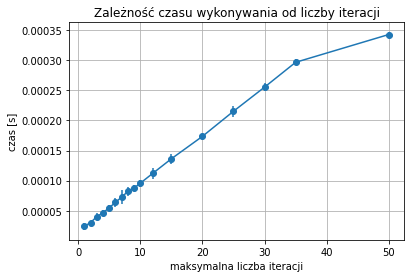

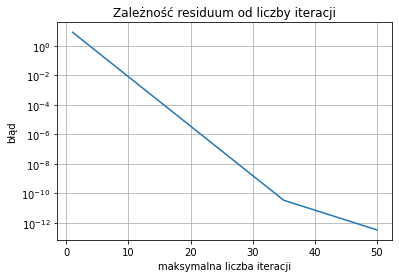

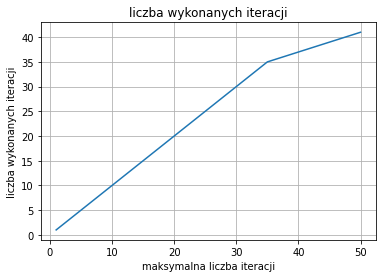

In [44]:
if is_diag_dominant(A2):
    error2 = []
    times = []
    errorbar2 = []
    iterations = []

    for n in iter_num:

        x_init = np.zeros(m)
        result2 = solve_jacobi(A2, b2, x_init, maxiter = n, epsilon = 1e-14)
        err2 = residual_norm(A2, result2[0], b2)
        iterations.append(result2[1])
        print(err2)
        error2.append(err2)
        time = %timeit -r 30 -n 20 -o solve_jacobi(A2, b2, x_init, maxiter = n, epsilon = 1e-14)
        times.append(time.average)
        errorbar2.append(time.stdev)

    plt.errorbar(iter_num, times, yerr = errorbar2, marker="o")
    plt.xlabel("maksymalna liczba iteracji")
    plt.ylabel("czas [s]")
    plt.title("Zależność czasu wykonywania od liczby iteracji")
    plt.grid()
    plt.show()

    plt.plot(iter_num, error2)
    plt.yscale('log')
    plt.xlabel("maksymalna liczba iteracji")
    plt.title("Zależność residuum od liczby iteracji")
    plt.ylabel("błąd")
    plt.grid()
    plt.show()

    plt.plot(iter_num, iterations)
    plt.xlabel("maksymalna liczba iteracji")
    plt.ylabel("liczba wykonanych iteracji")
    plt.grid()
    plt.title("liczba wykonanych iteracji")
    plt.show()
else:
    print("Macierz nie spełnia warunków koniecznych do zastosowania metody Jackobiego (nie jest diagonalnie dominująca)")

Metoda Gradientów Sprzężonych

In [23]:
if is_symmetric(A2):    
    error3 = []
    times = []
    errorbar3 = []
    exit = []
    

    for n in iter_num:

        result3 = sp.sparse.linalg.cg(A2, b2, maxiter = n)
        err3 = residual_norm(A2, result3[0], b2)
        exit.append(result3[1])
        print(err3)
        error3.append(err3)
        time = %timeit -r 30 -n 20 -o sp.sparse.linalg.cg(A2, b2, maxiter = n)
        times.append(time.average)
        errorbar3.append(time.stdev)

    plt.errorbar(iter_num, times, yerr = errorbar3, marker="o")
    plt.grid()
    plt.xlabel("liczba maksymalnych iteracji")
    plt.ylabel("czas [s]")
    plt.title("Zależność czasu wykonywania od liczby iteracji")
    plt.show()
    

    plt.plot(iter_num, error3)
    plt.yscale('log')
    plt.grid()
    plt.show()
    
    plt.scatter(iter_num, exit)
    plt.grid()
    plt.xlabel("liczba maksymalnych iteracji")
    plt.ylabel("liczba wykonanych iteracji lub 0")
    plt.title("liczba wykonanych iteracji, 0 ozacza osiągniętą max tolerancję")
    plt.show()

else:
    print("Macierz nie jest symetryczna. Nie można zastosować metody CG dla tej macierzy.")
    

Macierz nie jest symetryczna. Nie można zastosować metody CG dla tej macierzy.


Metoda GMRES

3.6612009252355944
122 µs ± 12.1 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
0.006092812298180057
170 µs ± 7.05 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
8.787516191205061e-07
259 µs ± 18.9 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
5.988127624460011e-14
363 µs ± 20.8 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
1.1417498175509914e-14
363 µs ± 18.5 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
1.352599797201142e-13
343 µs ± 26.5 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
1.5593603097988218e-13
301 µs ± 9.58 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
1.1214373707996214e-13
298 µs ± 19.8 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
4.035656876687307e-14
302 µs ± 21.3 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
4.3158982986779407e-14
326 µs ± 5.12 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
4.3158982986779407e-14
332 µs ± 15.8 µs per loop (mean ± std. dev. of 

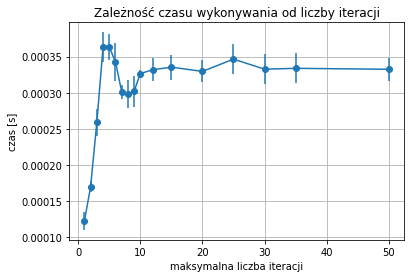

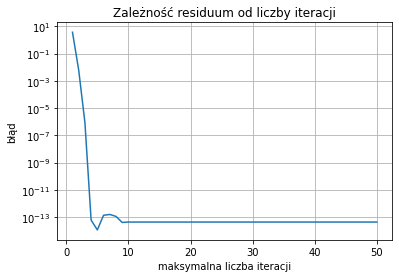

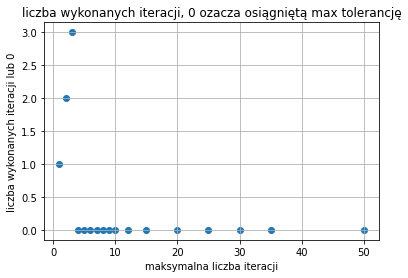

In [43]:
error4 = []
times = []
errorbar4 = []
exit = []

for n in iter_num:

    result4 = sp.sparse.linalg.gmres(A2, b2, restart = n, maxiter = n, tol = 1e-14)
    err4 = residual_norm(A2, result4[0], b2)
    exit.append(result4[1])
    print(err4)
    error4.append(err4)
    time = %timeit -r 30 -n 20 -o sp.sparse.linalg.gmres(A2, b2, restart = n, maxiter = n, tol = 1e-14)
    times.append(time.average)
    errorbar4.append(time.stdev)

plt.errorbar(iter_num, times, yerr = errorbar4, marker="o")
plt.grid()
plt.xlabel("maksymalna liczba iteracji")
plt.ylabel("czas [s]")
plt.title("Zależność czasu wykonywania od liczby iteracji")
plt.show()

plt.plot(iter_num, error4)
plt.yscale('log')
plt.grid()
plt.xlabel("maksymalna liczba iteracji")
plt.title("Zależność residuum od liczby iteracji")
plt.ylabel("błąd")
plt.show()

plt.scatter(iter_num, exit)
plt.grid()
plt.xlabel("maksymalna liczba iteracji")
plt.ylabel("liczba wykonanych iteracji lub 0")
plt.title("liczba wykonanych iteracji, 0 ozacza osiągniętą max tolerancję")
plt.show()

Metoda solve ponownie okazuje się najszybsza. 
Metoda Jackobiego dla macierzy diagonalnie zdominowanej jak i metoda GMRS spisały się mniej więcej podobnie, aczkowlwiek GMRS jest lepszy. Jacobi potrzebowałby jeszcze trochę iteracji aby dokładnie osiągnąć zadaną dokładność, co by znaczyło, że potrzebowałby więcej czasu. Co więcej, na wykresie można zobaczyć, że dla metody Jackobiego "prędkość" zmniejszania się błędu maleje dla większych numerów iteracji, co oznacza, że mniejsza coiteracyjne "poprawki" stały się mniej efektywne.

***Zadanie 7***   
Rozwiąż układ równań z Zadania 3 podpunkt c) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

In [25]:

result1 = np_linalg.solve(A3, b3)
error1 = residual_norm(A3, result1, b3)

print('Timing: ')
%timeit -r 30 -n 20 -o np_linalg.solve(A3, b3)

print("Błąd dla metody z użyciem solve  wynosi: {}\n".format(error1))

2.0197419421992741e-13
Timing: 
8.74 µs ± 3.61 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
Błąd dla metody z użyciem solve  wynosi: 2.0197419421992741e-13



In [26]:
if is_diag_dominant(A3):
    error2 = []
    times = []
    errorbar2 = []
    iterations = []

    for n in iter_num:

        x_init = np.zeros(m)
        result2 = solve_jacobi(A3, b3, x_init, maxiter = n)
        err2 = residual_norm(A3, result2[0], b2)
        iterations.append(result2[1])
        print(err2)
        error2.append(err2)
        time = %timeit -r 30 -n 20 -o solve_jacobi(A3, b3, x_init, maxiter = n)
        times.append(time.average)
        errorbar2.append(time.stdev)

    plt.errorbar(iter_num, times, yerr = errorbar2, marker="o")
    plt.grid()
    plt.xlabel("maksymalna liczba iteracji")
    plt.ylabel("czas [s]")
    plt.title("Zależność czasu wykonywania od liczby iteracji")
    plt.show()

    plt.plot(iter_num, error2)
    plt.yscale('log')
    plt.grid()
    plt.xlabel("maksymalna liczba iteracji")
    plt.title("Zależność residuum od liczby iteracji")
    plt.ylabel("błąd")
    plt.show()

    plt.plot(iter_num, iterations)
else:
    print("Macierz nie spełnia warunków koniecznych do zastosowania metody Jackobiego (nie jest diagonalnie dominująca)")

Macierz nie spełnia warunków koniecznych do zastosowania metody Jackobiego (nie jest diagonalnie dominująca)


Metoda Gradientów Sprzężonych

8.557879279615388
86.3 µs ± 6.69 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
13.262381852588632
104 µs ± 1.8 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
3.7461305496281794
115 µs ± 6.19 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
24.169748008623195
149 µs ± 6.6 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
5.595018444021805
153 µs ± 10.1 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
3.7387001408025546
169 µs ± 12 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
1.6567737604354114
189 µs ± 14.6 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
7.2565911085450825
199 µs ± 6.5 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
7.76028725430021
224 µs ± 23.9 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
8.915016468002272e-06
238 µs ± 21 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
8.626585787838047e-13
272 µs ± 22 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
3.20926284036778

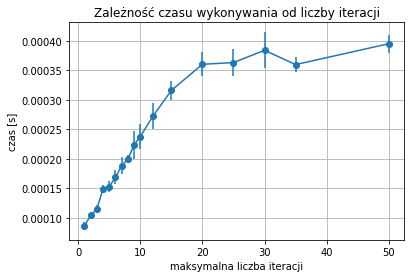

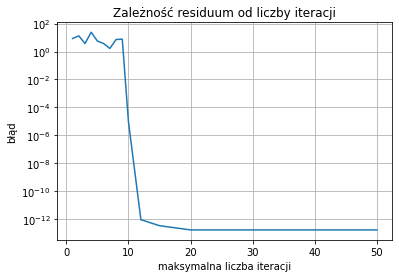

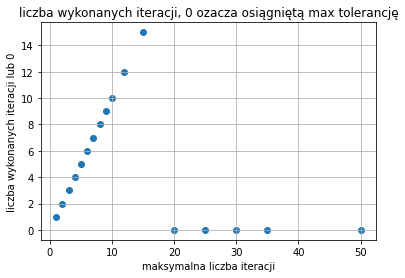

In [42]:
if is_symmetric(A3):    
    error3 = []
    times = []
    errorbar3 = []
    exit = []

    for n in iter_num:

        result3 = sp.sparse.linalg.cg(A3, b3, maxiter = n, tol=1e-14)
        err3 = residual_norm(A3, result3[0], b3)
        exit.append(result3[1])
        print(err3)
        error3.append(err3)
        time = %timeit -r 30 -n 20 -o sp.sparse.linalg.cg(A3, b3, maxiter = n, tol=1e-14)
        times.append(time.average)
        errorbar3.append(time.stdev)

    plt.errorbar(iter_num, times, yerr = errorbar3, marker="o")
    plt.grid()
    plt.xlabel("maksymalna liczba iteracji")
    plt.ylabel("czas [s]")
    plt.title("Zależność czasu wykonywania od liczby iteracji")
    plt.show()

    plt.plot(iter_num, error3)
    plt.yscale('log')
    plt.grid()
    plt.xlabel("maksymalna liczba iteracji")
    plt.title("Zależność residuum od liczby iteracji")
    plt.ylabel("błąd")
    plt.show()
    
    plt.scatter(iter_num, exit)
    plt.grid()
    plt.xlabel("maksymalna liczba iteracji")
    plt.ylabel("liczba wykonanych iteracji lub 0")
    plt.title("liczba wykonanych iteracji, 0 ozacza osiągniętą max tolerancję")
    plt.show()
    

else:
    print("Macierz nie jest symetryczna. Nie można zastosować metody CG dla tej macierzy.")
    

Funkcja solve

7.622056657213797
122 µs ± 13.9 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
3.978045604543693
165 µs ± 6.85 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
1.876422702510955
256 µs ± 17.3 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
1.3355563150972025
346 µs ± 10.7 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
1.285630190361194
474 µs ± 20.8 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
1.2073263185550334
645 µs ± 36.4 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
0.5954423930877879
801 µs ± 32.7 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
6.9627626609830175e-06
992 µs ± 32.4 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
1.1780319140835894e-07
1.22 ms ± 33.7 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
1.9065862296939058e-13
220 µs ± 15.7 µs per loop (mean ± std. dev. of 30 runs, 20 loops each)
1.014858018570358e-13
218 µs ± 11.7 µs per loop (mean ± std. dev. of 30 runs, 20 loops each

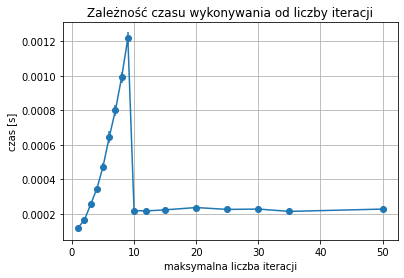

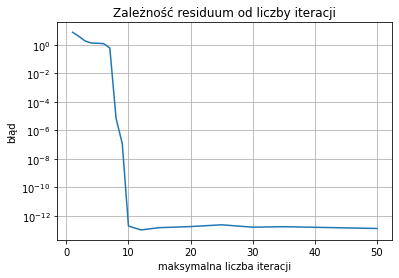

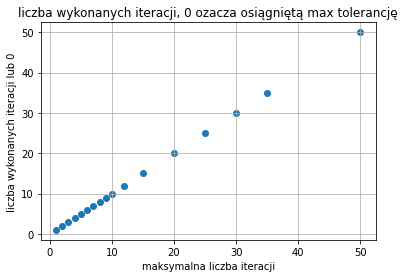

In [41]:
error4 = []
times = []
errorbar4 = []
exit = []

for n in iter_num:

    result4 = sp.sparse.linalg.gmres(A3, b3, restart = n, maxiter = n, tol = 1e-16)
    err4 = residual_norm(A3, result4[0], b3)
    exit.append(result4[1])
    print(err4)
    error4.append(err4)
    time = %timeit -r 30 -n 20 -o sp.sparse.linalg.gmres(A3, b3, restart = n, maxiter = n, tol = 1e-1)
    times.append(time.average)
    errorbar4.append(time.stdev)

plt.errorbar(iter_num, times, yerr = errorbar4, marker="o")
plt.grid()
plt.xlabel("maksymalna liczba iteracji")
plt.ylabel("czas [s]")
plt.title("Zależność czasu wykonywania od liczby iteracji")
plt.show()

plt.plot(iter_num, error4)
plt.grid()
plt.yscale('log')
plt.xlabel("maksymalna liczba iteracji")
plt.title("Zależność residuum od liczby iteracji")
plt.ylabel("błąd")
plt.show()

plt.scatter(iter_num, exit)
plt.grid()
plt.xlabel("maksymalna liczba iteracji")
plt.ylabel("liczba wykonanych iteracji lub 0")
plt.title("liczba wykonanych iteracji, 0 ozacza osiągniętą max tolerancję")
plt.show()

Solve pozostaje najszybszą metodą, aczkolwiek dwie pozostałe metody pozwalają na osiągnięcie dokładniejszego rozwiązania kosztem zajętego czasu.
GRMS wymaga ok 230 mikro sekund na osiągnięcie dokładności rzędu e-14, gdy solve potrzebuje jedynie około 10
Metoda grandientów sprzężonych zachowuje się bardzo podobnie do metody GRMS, jedynie jest trochę wolniejsza.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)